In [29]:
import pandas as pd
import numpy as np

from collections import Counter
from easymoney.money import EasyPeasy

import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

%matplotlib inline

# School Data

In [30]:
school_df = pd.read_csv('../data/school_df.csv')

In [31]:
school_df.shape

(7593, 21)

In [32]:
school_df.isnull().sum()

Unnamed: 0                                       0
id                                               0
school.branches                                  0
school.carnegie_basic                          446
school.carnegie_size_setting                   446
school.carnegie_undergrad                      446
school.degrees_awarded.highest                   0
school.degrees_awarded.predominant               0
school.faculty_salary                         3139
school.ft_faculty_rate                        3656
school.institutional_characteristics.level       0
school.instructional_expenditure_per_fte       460
school.locale                                  446
school.main_campus                               0
school.name                                      0
school.online_only                             446
school.operating                                 0
school.ownership                                 0
school.state                                     0
school.tuition_revenue_per_fte 

In [33]:
# Going to explore schools that meet certain criteria

mask_list = [(school_df['school.degrees_awarded.highest'] > 2),
             (school_df['school.degrees_awarded.predominant'] > 2),
             (school_df['school.carnegie_undergrad']>4),
             (school_df['school.carnegie_size_setting']>5),
             (school_df['school.institutional_characteristics.level']==1),
             (school_df['school.main_campus']==1),
             (school_df['school.online_only']==0),
             (school_df['school.operating']==1),
             (school_df['school.name'] != 'University of Phoenix-Arizona')]

criteria_mask = mask_list[0] & mask_list[1] & mask_list[2] & mask_list[3] & mask_list[4] & mask_list[5] & mask_list[6] & mask_list[7] & mask_list[8]

In [34]:
school_df[criteria_mask].shape

(1793, 21)

In [35]:
# Setting this criteria (removing small schools, etc.) greatly reduced our missing values
school_df[criteria_mask].isnull().sum()

Unnamed: 0                                     0
id                                             0
school.branches                                0
school.carnegie_basic                          0
school.carnegie_size_setting                   0
school.carnegie_undergrad                      0
school.degrees_awarded.highest                 0
school.degrees_awarded.predominant             0
school.faculty_salary                         17
school.ft_faculty_rate                        76
school.institutional_characteristics.level     0
school.instructional_expenditure_per_fte       0
school.locale                                  0
school.main_campus                             0
school.name                                    0
school.online_only                             0
school.operating                               0
school.ownership                               0
school.state                                   0
school.tuition_revenue_per_fte                 0
school.under_investi

In [36]:
# Set index to unique school ID assigned by government
school_df = school_df[criteria_mask]
school_df['id'] = school_df['id'].apply(lambda x: int(x))
school_df.set_index('id', inplace=True, drop=True)
school_df.drop('Unnamed: 0', axis=1, inplace=True)

In [37]:
Counter(school_df['school.ownership'])

Counter({1: 544, 2: 1182, 3: 67})

In [38]:
# These id's will be the only ones we are concerned with in subsequent dataframes
college_ids = school_df.index
college_ids

Int64Index([137351, 135364, 133553, 126076, 131803, 128771, 130934, 139940,
            142522, 145637,
            ...
            430810, 123280, 436438, 233611, 217606, 439446, 117575, 433660,
            200873, 443049],
           dtype='int64', name='id', length=1793)

In [39]:
# Schools under investigation, fun,...
list(school_df[school_df['school.under_investigation']==1]['school.name'])

['Cheyney University of Pennsylvania',
 'Ecclesia College',
 'South Baylo University',
 'Eastern Nazarene College',
 'Carver Bible College',
 'Lincoln University',
 'Faith International University']

In [40]:
# Exploring
school_df.sort_values('school.branches', ascending=False)[['school.name', 'school.branches']]

,school.name,school.branches
id,,
459994,Strayer University-Global Region,79
131803,Strayer University-District of Columbia,79
219204,National American University-Rapid City,33
428444,The Art Institute of Phoenix,32
436438,Argosy University-Orange County,28
214777,Pennsylvania State University-Main Campus,23
482477,DeVry University-Illinois,23
169479,Davenport University,13
454227,Chamberlain College of Nursing-Illinois,12


In [41]:
# Faculty salary is in per/month, add a feature for 'Yearly'
school_df['faculty_salary_yrly'] = school_df['school.faculty_salary'] * 12

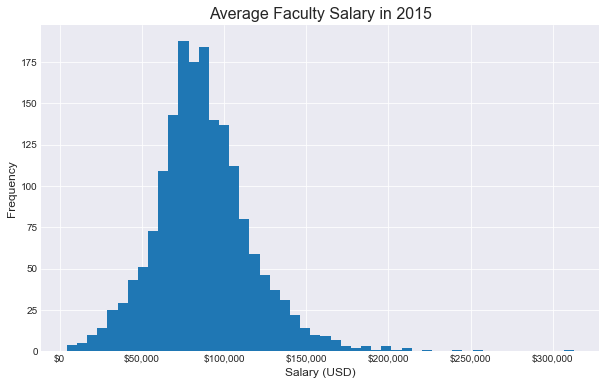

In [42]:
# Faculty salary histogram
fig, ax = plt.subplots(figsize=(10,6))
plt.hist(school_df['faculty_salary_yrly'].dropna(), bins=50)
plt.title('Average Faculty Salary in 2015', fontsize=16)

ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])

plt.xlabel('Salary (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12);

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text yticklabel objects>)

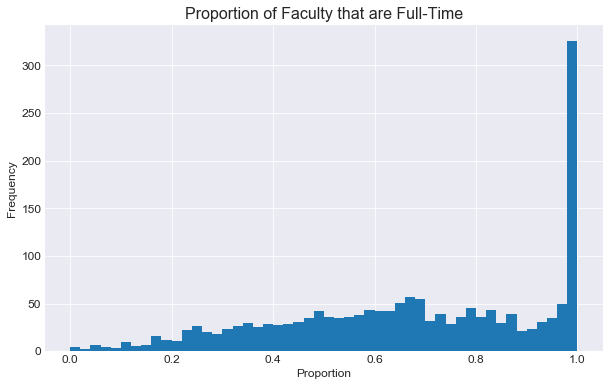

In [43]:
# Proportion of full-time faculty histogram
fig, ax = plt.subplots(figsize=(10,6))
plt.hist(school_df['school.ft_faculty_rate'].dropna(), bins=50)
plt.title('Proportion of Faculty that are Full-Time', fontsize=16)
plt.xlabel('Proportion', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

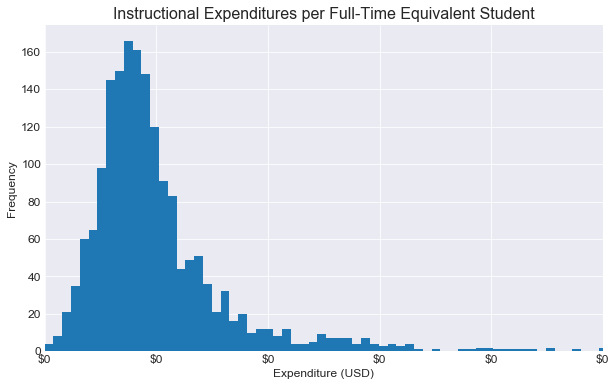

In [44]:
fig, ax2 = plt.subplots(figsize=(10,6))
plt.hist(school_df['school.instructional_expenditure_per_fte'].dropna(), bins=500)
plt.title('Instructional Expenditures per Full-Time Equivalent Student', fontsize=16)

ax2.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])

plt.xlabel('Expenditure (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0,50000);

In [45]:
school_df.sort_values('school.instructional_expenditure_per_fte', ascending=False)

,school.branches,school.carnegie_basic,school.carnegie_size_setting,school.carnegie_undergrad,school.degrees_awarded.highest,school.degrees_awarded.predominant,school.faculty_salary,school.ft_faculty_rate,school.institutional_characteristics.level,school.instructional_expenditure_per_fte,school.locale,school.main_campus,school.name,school.online_only,school.operating,school.ownership,school.state,school.tuition_revenue_per_fte,school.under_investigation,faculty_salary_yrly
id,,,,,,,,,,,,,,,,,,,,
228635,1,25.0,9.0,10.0,4,4,8621.0,0.8143,1,393969.0,11.0,1,University of Texas Southwestern Medical Center,0.0,1,1,TX,10771.0,0,103452.0
229300,1,25.0,12.0,11.0,4,3,9791.0,0.7062,1,140584.0,11.0,1,The University of Texas Health Science Center ...,0.0,1,1,TX,10586.0,0,117492.0
228644,1,25.0,9.0,11.0,4,3,8524.0,0.6000,1,126647.0,11.0,1,The University of Texas Health Science Center ...,0.0,1,1,TX,11521.0,0,102288.0
130794,1,15.0,17.0,14.0,4,3,16516.0,0.7357,1,111600.0,12.0,1,Yale University,0.0,1,2,CT,16395.0,0,198192.0
179867,1,15.0,17.0,14.0,4,3,14021.0,0.6452,1,109265.0,21.0,1,Washington University in St Louis,0.0,1,2,MO,25310.0,0,168252.0
243744,1,15.0,17.0,14.0,4,3,21354.0,0.9776,1,101724.0,21.0,1,Stanford University,0.0,1,2,CA,26010.0,0,256248.0
110404,1,15.0,10.0,14.0,4,3,18636.0,0.9415,1,95021.0,12.0,1,California Institute of Technology,0.0,1,2,CA,17131.0,0,223632.0
228653,1,25.0,9.0,11.0,4,3,8476.0,0.9706,1,91653.0,31.0,1,The University of Texas Medical Branch,0.0,1,1,TX,8971.0,0,101712.0
144050,1,15.0,17.0,14.0,4,3,17446.0,0.8326,1,85372.0,11.0,1,University of Chicago,0.0,1,2,IL,27429.0,0,209352.0


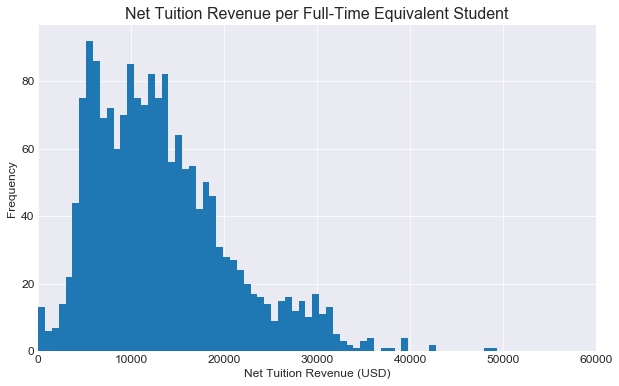

In [46]:
fig, ax3 = plt.subplots(figsize=(10,6))
plt.hist(school_df['school.tuition_revenue_per_fte'].dropna(), bins=200)
plt.title('Net Tuition Revenue per Full-Time Equivalent Student', fontsize=16)

#ax3.set_xticklabels(['${:,}'.format(int(x)) for x in ax3.get_xticks().tolist()])

plt.xlabel('Net Tuition Revenue (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0,60000);

In [47]:
school_df.sort_values('school.tuition_revenue_per_fte', ascending=False)

,school.branches,school.carnegie_basic,school.carnegie_size_setting,school.carnegie_undergrad,school.degrees_awarded.highest,school.degrees_awarded.predominant,school.faculty_salary,school.ft_faculty_rate,school.institutional_characteristics.level,school.instructional_expenditure_per_fte,school.locale,school.main_campus,school.name,school.online_only,school.operating,school.ownership,school.state,school.tuition_revenue_per_fte,school.under_investigation,faculty_salary_yrly
id,,,,,,,,,,,,,,,,,,,,
160977,1,21.0,11.0,14.0,3,3,10873.0,0.8030,1,76031.0,13.0,1,Bates College,0.0,1,2,ME,147403.0,0,130476.0
121257,1,21.0,11.0,10.0,3,3,10674.0,0.8230,1,26432.0,21.0,1,Pitzer College,0.0,1,2,CA,48718.0,0,128088.0
404338,1,29.0,6.0,10.0,4,3,NaN,0.0000,1,17219.0,13.0,1,Schiller International University,0.0,1,3,FL,48524.0,0,NaN
445735,1,26.0,9.0,11.0,4,3,10501.0,0.4908,1,17710.0,11.0,1,Roseman University of Health Sciences,0.0,1,2,NV,42707.0,0,126012.0
230959,2,21.0,11.0,14.0,4,3,10741.0,0.8726,1,25142.0,32.0,1,Middlebury College,0.0,1,2,VT,42652.0,0,128892.0
190752,1,-3.0,8.0,11.0,3,3,5500.0,0.8889,1,53179.0,11.0,1,Yeshiva of Far Rockaway Derech Ayson Rabbinica...,0.0,1,2,NY,39556.0,0,66000.0
123952,1,30.0,6.0,14.0,4,3,12204.0,0.4058,1,12645.0,11.0,1,Southern California Institute of Architecture,0.0,1,2,CA,39432.0,0,146448.0
160959,1,21.0,7.0,15.0,4,3,7503.0,1.0000,1,13616.0,33.0,1,College of the Atlantic,0.0,1,2,ME,39293.0,0,90036.0
219204,33,20.0,6.0,5.0,3,3,5681.0,0.0247,1,14901.0,13.0,1,National American University-Rapid City,0.0,1,3,SD,39245.0,0,68172.0


### Make a Locales Bar Chart

In [48]:
locales = Counter(school_df['school.locale'])

In [49]:
locales_dict = {11:'City - Large',
               12:'City - Midsize',
               13:'City - Small',
               21:'Suburb - Large',
               22:'Suburb - Midsize',
               23:'Suburb - Small',
               31:'Town - Fringe',
               32:'Town - Distant',
               33:'Town - Remote',
               41:'Rural - Fringe',
               42:'Rural - Distant',
               43:'Rural - Remote'}

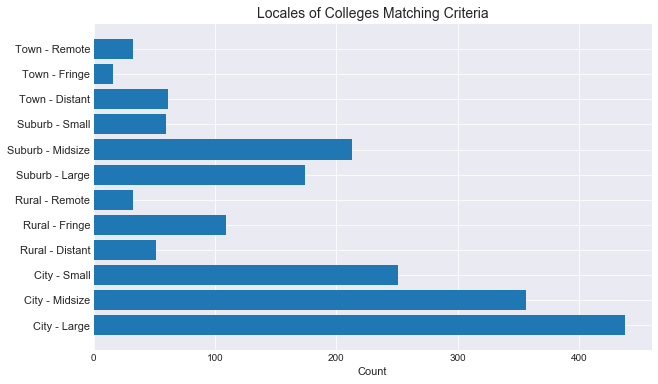

In [50]:
fig, ax = plt.subplots(figsize=(10,6))
plt.barh(list(locales_dict.values()), list(locales.values()))

plt.title('Locales of Colleges Matching Criteria', fontsize=14)
plt.xlabel('Count', fontsize=11)
plt.yticks(fontsize=11);

## State Heat Map

In [51]:
import pysal as ps
from pysal.contrib.viz import mapping as viz

In [52]:
states = pd.read_csv('../data/usjoin_corrected.csv')
states_in_order = states['Unnamed: 0']
states_in_order

0         Washington
1            Montana
2              Maine
3       North Dakota
4       South Dakota
5            Wyoming
6          Wisconsin
7              Idaho
8            Vermont
9          Minnesota
10            Oregon
11     New Hampshire
12              Iowa
13     Massachusetts
14          Nebraska
15          New York
16      Pennsylvania
17       Connecticut
18      Rhode Island
19        New Jersey
20           Indiana
21            Nevada
22              Utah
23        California
24              Ohio
25          Illinois
26          Delaware
27     West Virginia
28          Maryland
29          Colorado
30          Kentucky
31            Kansas
32          Virginia
33          Missouri
34           Arizona
35          Oklahoma
36    North Carolina
37         Tennessee
38             Texas
39        New Mexico
40           Alabama
41       Mississippi
42           Georgia
43    South Carolina
44          Arkansas
45         Louisiana
46           Florida
47          M

In [53]:
counter_dict = Counter(school_df['school.state'])
counter_dict

Counter({'AK': 4,
         'AL': 30,
         'AR': 20,
         'AZ': 11,
         'CA': 132,
         'CO': 23,
         'CT': 21,
         'DC': 11,
         'DE': 5,
         'FL': 52,
         'GA': 49,
         'GU': 2,
         'HI': 7,
         'IA': 33,
         'ID': 8,
         'IL': 76,
         'IN': 43,
         'KS': 25,
         'KY': 28,
         'LA': 25,
         'MA': 79,
         'MD': 30,
         'ME': 17,
         'MI': 44,
         'MN': 36,
         'MO': 51,
         'MS': 15,
         'MT': 9,
         'NC': 57,
         'ND': 9,
         'NE': 22,
         'NH': 13,
         'NJ': 36,
         'NM': 10,
         'NV': 5,
         'NY': 161,
         'OH': 68,
         'OK': 25,
         'OR': 28,
         'PA': 104,
         'PR': 35,
         'RI': 9,
         'SC': 33,
         'SD': 12,
         'TN': 44,
         'TX': 87,
         'UT': 9,
         'VA': 45,
         'VI': 1,
         'VT': 15,
         'WA': 25,
         'WI': 36,
         'WV': 17,
 

In [54]:
abbrev_to_full = {'AK':'Alaska', 'AL':'Alabama', 'AR':'Arkansas', 'AZ':'Arizona', 
                  'CA':'California', 'CO':'Colorado', 'CT':'Connecticut', 'DC':'DC', 
                  'DE':'Delaware', 'FL':'Florida', 'GA':'Georgia', 'GU':'GU', 'HI': 'Hawaii', 
                  'IA':'Iowa', 'ID':'Idaho', 'IL':'Illinois', 'IN':'Indiana', 'KS':'Kansas',
                  'KY':'Kentucky', 'LA':'Louisiana', 'MA':'Massachusetts', 'MD':'Maryland', 
                  'ME':'Maine', 'MI':'Michigan', 'MN':'Minnesota', 'MO':'Missouri', 
                  'MS':'Mississippi', 'MT':'Montana', 'NC':'North Carolina', 
                  'ND':'North Dakota', 'NE':'Nebraska', 'NH':'New Hampshire', 
                  'NJ':'New Jersey', 'NM':'New Mexico', 'NV':'Nevada', 'NY':'New York', 
                  'OH':'Ohio', 'OK':'Oklahoma', 'OR':'Oregon', 'PA':'Pennsylvania', 'PR':'PR', 
                  'RI':'Rhode Island', 'SC':'South Carolina', 'SD':'South Dakota', 
                  'TN':'Tennessee', 'TX':'Texas', 'UT':'Utah', 'VA':'Virginia', 'VI':'VI', 
                  'VT':'Vermont', 'WA':'Washington', 'WI':'Wisconsin', 'WV':'West Virginia', 
                  'WY':'Wyoming'}

In [55]:
state_df = pd.DataFrame(columns=['state', 'count'])
for key in abbrev_to_full.keys():
    state_df = state_df.append({'state':abbrev_to_full[key], 'count':counter_dict[key]}, ignore_index=True)

In [56]:
state_df.set_index('state', inplace=True)

In [57]:
state_df_ordered = pd.DataFrame(columns=['state', 'count'])
for state in states_in_order:
    state_df_ordered = state_df_ordered.append({'state':state, 
                                                'count':state_df['count'][state]}, 
                                               ignore_index=True)

In [58]:
state_df_ordered.head()

,state,count
0,Washington,25
1,Montana,9
2,Maine,17
3,North Dakota,9
4,South Dakota,12


In [59]:
state_df_ordered.shape

(48, 2)

In [60]:
state_df_ordered.to_csv('../data/state_df_ordered.csv')

In [61]:
shp_link = '../data/us48.shp'

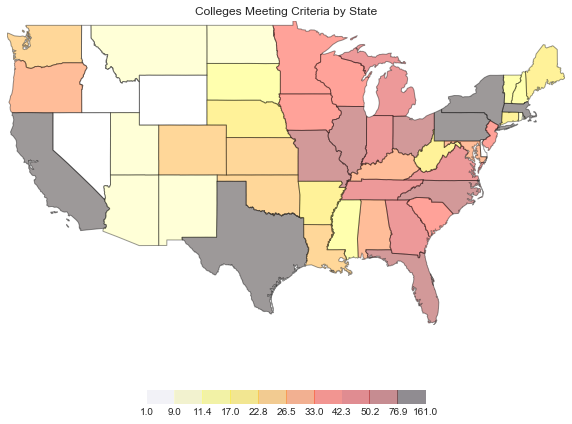

In [62]:
viz.plot_choropleth(shp_link,
                    values = np.array(ps.open('../data/state_df_ordered.csv').by_col('count')),
                    k=10,
                    type = 'quantiles',
                    figsize=(10,8),
                    title='Colleges Meeting Criteria by State')

# Student Data

In [63]:
student_df = pd.read_csv('../data/student_df.csv')

In [64]:
# Only concerned with colleges that met our criteria
id_mask = student_df['id'].apply(lambda x: True if x in list(college_ids) else False)
student_df = student_df[id_mask]

In [65]:
# Set government id to index
student_df['id'] = student_df['id'].apply(lambda x: int(x))
student_df.set_index('id',inplace=True)

In [66]:
student_df['2015.student.size'].sort_values(ascending=False)

id
132903    54091.0
232557    49542.0
228723    48707.0
204796    44131.0
104717    42444.0
183026    42247.0
104151    41222.0
133951    40208.0
214777    40179.0
228778    39057.0
171100    38853.0
110608    36979.0
154022    36405.0
163204    36119.0
186380    35102.0
260901    35040.0
228459    33480.0
225511    33300.0
110565    33009.0
104179    32964.0
151351    32694.0
134130    32376.0
134097    32229.0
145637    32170.0
110583    32025.0
100751    31005.0
227216    30533.0
174066    30511.0
228769    30358.0
137351    30282.0
           ...   
189273       44.0
123280       43.0
194693       43.0
435000       39.0
205124       38.0
430670       36.0
439446       35.0
200624       35.0
190752       34.0
167677       33.0
154174       32.0
199971       31.0
457226       29.0
404338       28.0
189264       25.0
145460       25.0
193061       24.0
481225       22.0
247825       22.0
457402       22.0
476692       21.0
110918       18.0
475635       17.0
430704       17.0
443058 

In [67]:
student_df[student_df['2015.student.size'] > 1000].shape

(1271, 136)

Text(0,0.5,'Frequency')

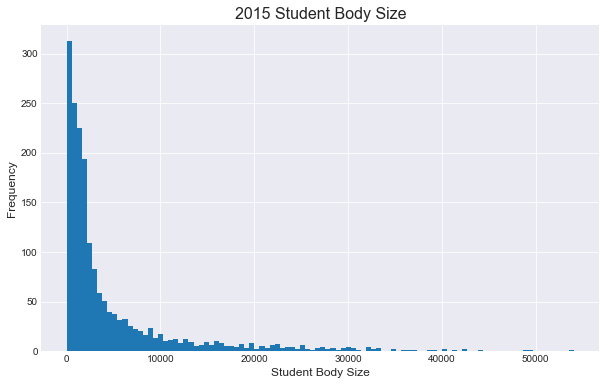

In [68]:
# Plot histogram of student body sizes in 2015
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(student_df['2015.student.size'], bins=100);
plt.title('2015 Student Body Size', fontsize=16)
plt.xlabel('Student Body Size', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

In [69]:
student_df.sort_values('2015.student.size', ascending=False)[['2015.student.size','school.name']]

,2015.student.size,school.name
id,,
132903,54091.0,University of Central Florida
232557,49542.0,Liberty University
228723,48707.0,Texas A & M University-College Station
204796,44131.0,Ohio State University-Main Campus
104717,42444.0,Grand Canyon University
183026,42247.0,Southern New Hampshire University
104151,41222.0,Arizona State University-Tempe
133951,40208.0,Florida International University
214777,40179.0,Pennsylvania State University-Main Campus


# Cost Data

In [70]:
cost_df = pd.read_csv('../data/cost_df.csv')

In [71]:
cost_df.head()

,Unnamed: 0,2009.cost.net_price.private.by_income_level.0-30000,2009.cost.net_price.private.by_income_level.110001-plus,2009.cost.net_price.private.by_income_level.48001-75000,2009.cost.net_price.public.by_income_level.0-30000,2009.cost.net_price.public.by_income_level.110001-plus,2009.cost.net_price.public.by_income_level.48001-75000,2010.cost.net_price.private.by_income_level.0-30000,2010.cost.net_price.private.by_income_level.110001-plus,2010.cost.net_price.private.by_income_level.48001-75000,...,2014.cost.net_price.public.by_income_level.110001-plus,2014.cost.net_price.public.by_income_level.48001-75000,2015.cost.net_price.private.by_income_level.0-30000,2015.cost.net_price.private.by_income_level.110001-plus,2015.cost.net_price.private.by_income_level.48001-75000,2015.cost.net_price.public.by_income_level.0-30000,2015.cost.net_price.public.by_income_level.110001-plus,2015.cost.net_price.public.by_income_level.48001-75000,id,school.ownership
0,0,NaN,NaN,NaN,6089.0,13828.0,11973.0,NaN,NaN,NaN,...,15676.0,11583.0,NaN,NaN,NaN,7544.0,17088.0,12287.0,137351.0,1.0
1,1,NaN,NaN,NaN,2014.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2716.0,NaN,NaN,136659.0,1.0
2,2,NaN,NaN,NaN,6148.0,9559.0,8598.0,NaN,NaN,NaN,...,12231.0,9789.0,NaN,NaN,NaN,9416.0,14558.0,12075.0,137078.0,1.0
3,3,NaN,NaN,NaN,5887.0,10317.0,9017.0,NaN,NaN,NaN,...,13887.0,12337.0,NaN,NaN,NaN,8836.0,11900.0,11490.0,132709.0,1.0
4,4,17753.0,NaN,NaN,NaN,NaN,NaN,10483.0,NaN,NaN,...,NaN,NaN,NaN,NaN,5151.0,NaN,NaN,NaN,135364.0,2.0


In [72]:
# Only interested in schools that met our criteria
id_mask = cost_df['id'].apply(lambda x: True if x in list(college_ids) else False)
cost_df = cost_df[id_mask]

In [73]:
cost_df.shape

(1793, 45)

In [74]:
Counter(cost_df['school.ownership'])

Counter({1.0: 544, 2.0: 1182, 3.0: 67})

In [75]:
cost_df['school.ownership'] = cost_df['school.ownership'].apply(lambda x: int(x))
cost_df['id'] = cost_df['id'].apply(lambda x: int(x))
cost_df.set_index('id', inplace=True, drop=True)

In [76]:
# Will make separate df slices for public and private schools

public_cols = ['2009.cost.net_price.public.by_income_level.0-30000',
       '2009.cost.net_price.public.by_income_level.110001-plus',
       '2009.cost.net_price.public.by_income_level.48001-75000',
       '2010.cost.net_price.public.by_income_level.0-30000',
       '2010.cost.net_price.public.by_income_level.110001-plus',
       '2010.cost.net_price.public.by_income_level.48001-75000',
       '2011.cost.net_price.public.by_income_level.0-30000',
       '2011.cost.net_price.public.by_income_level.110001-plus',
       '2011.cost.net_price.public.by_income_level.48001-75000',
       '2012.cost.net_price.public.by_income_level.0-30000',
       '2012.cost.net_price.public.by_income_level.110001-plus',
       '2012.cost.net_price.public.by_income_level.48001-75000',
       '2013.cost.net_price.public.by_income_level.0-30000',
       '2013.cost.net_price.public.by_income_level.110001-plus',
       '2013.cost.net_price.public.by_income_level.48001-75000',
       '2014.cost.net_price.public.by_income_level.0-30000',
       '2014.cost.net_price.public.by_income_level.110001-plus',
       '2014.cost.net_price.public.by_income_level.48001-75000',
       '2015.cost.net_price.public.by_income_level.0-30000',
       '2015.cost.net_price.public.by_income_level.110001-plus',
       '2015.cost.net_price.public.by_income_level.48001-75000']

private_cols = ['2009.cost.net_price.private.by_income_level.110001-plus',
       '2009.cost.net_price.private.by_income_level.48001-75000',
       '2010.cost.net_price.private.by_income_level.0-30000',
       '2010.cost.net_price.private.by_income_level.110001-plus',
       '2010.cost.net_price.private.by_income_level.48001-75000',
       '2011.cost.net_price.private.by_income_level.0-30000',
       '2011.cost.net_price.private.by_income_level.110001-plus',
       '2011.cost.net_price.private.by_income_level.48001-75000',
       '2012.cost.net_price.private.by_income_level.0-30000',
       '2012.cost.net_price.private.by_income_level.110001-plus',
       '2012.cost.net_price.private.by_income_level.48001-75000',
       '2013.cost.net_price.private.by_income_level.0-30000',
       '2013.cost.net_price.private.by_income_level.110001-plus',
       '2013.cost.net_price.private.by_income_level.48001-75000',
       '2014.cost.net_price.private.by_income_level.0-30000',
       '2014.cost.net_price.private.by_income_level.110001-plus',
       '2014.cost.net_price.private.by_income_level.48001-75000',
       '2015.cost.net_price.private.by_income_level.0-30000',
       '2015.cost.net_price.private.by_income_level.110001-plus',
       '2015.cost.net_price.private.by_income_level.48001-75000']

In [77]:
cost_df.head()

,Unnamed: 0,2009.cost.net_price.private.by_income_level.0-30000,2009.cost.net_price.private.by_income_level.110001-plus,2009.cost.net_price.private.by_income_level.48001-75000,2009.cost.net_price.public.by_income_level.0-30000,2009.cost.net_price.public.by_income_level.110001-plus,2009.cost.net_price.public.by_income_level.48001-75000,2010.cost.net_price.private.by_income_level.0-30000,2010.cost.net_price.private.by_income_level.110001-plus,2010.cost.net_price.private.by_income_level.48001-75000,...,2014.cost.net_price.public.by_income_level.0-30000,2014.cost.net_price.public.by_income_level.110001-plus,2014.cost.net_price.public.by_income_level.48001-75000,2015.cost.net_price.private.by_income_level.0-30000,2015.cost.net_price.private.by_income_level.110001-plus,2015.cost.net_price.private.by_income_level.48001-75000,2015.cost.net_price.public.by_income_level.0-30000,2015.cost.net_price.public.by_income_level.110001-plus,2015.cost.net_price.public.by_income_level.48001-75000,school.ownership
id,,,,,,,,,,,,,,,,,,,,,
137351,0,NaN,NaN,NaN,6089.0,13828.0,11973.0,NaN,NaN,NaN,...,6735.0,15676.0,11583.0,NaN,NaN,NaN,7544.0,17088.0,12287.0,1
135364,4,17753.0,NaN,NaN,NaN,NaN,NaN,10483.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5151.0,NaN,NaN,NaN,2
133553,7,29351.0,35451.0,31314.0,NaN,NaN,NaN,29581.0,35878.0,34066.0,...,NaN,NaN,NaN,26084.0,34243.0,30995.0,NaN,NaN,NaN,2
126076,17,6378.0,NaN,6950.0,NaN,NaN,NaN,7963.0,13000.0,7376.0,...,NaN,NaN,NaN,7027.0,NaN,8667.0,NaN,NaN,NaN,2
131803,2,29222.0,32532.0,31860.0,NaN,NaN,NaN,29403.0,NaN,NaN,...,NaN,NaN,NaN,27322.0,NaN,NaN,NaN,NaN,NaN,3


In [78]:
# Separate public and private schools

public_df = pd.DataFrame(columns=public_cols)
private_df = pd.DataFrame(columns=private_cols)
    
for i in cost_df.index:
    if cost_df.loc[i, 'school.ownership'] == 1: # public
        public_df = public_df.append(cost_df.loc[i, public_cols])
    
    else: # private
        private_df = private_df.append(cost_df.loc[i, private_cols])

In [79]:
public_df.head()

,2009.cost.net_price.public.by_income_level.0-30000,2009.cost.net_price.public.by_income_level.110001-plus,2009.cost.net_price.public.by_income_level.48001-75000,2010.cost.net_price.public.by_income_level.0-30000,2010.cost.net_price.public.by_income_level.110001-plus,2010.cost.net_price.public.by_income_level.48001-75000,2011.cost.net_price.public.by_income_level.0-30000,2011.cost.net_price.public.by_income_level.110001-plus,2011.cost.net_price.public.by_income_level.48001-75000,2012.cost.net_price.public.by_income_level.0-30000,...,2012.cost.net_price.public.by_income_level.48001-75000,2013.cost.net_price.public.by_income_level.0-30000,2013.cost.net_price.public.by_income_level.110001-plus,2013.cost.net_price.public.by_income_level.48001-75000,2014.cost.net_price.public.by_income_level.0-30000,2014.cost.net_price.public.by_income_level.110001-plus,2014.cost.net_price.public.by_income_level.48001-75000,2015.cost.net_price.public.by_income_level.0-30000,2015.cost.net_price.public.by_income_level.110001-plus,2015.cost.net_price.public.by_income_level.48001-75000
137351,6089.0,13828.0,11973.0,5282.0,15452.0,12568.0,6156.0,16553.0,12726.0,8303.0,...,13209.0,7536.0,19200.0,10246.0,6735.0,15676.0,11583.0,7544.0,17088.0,12287.0
128771,11088.0,17207.0,14216.0,9967.0,18024.0,13674.0,10926.0,18742.0,14309.0,12542.0,...,14978.0,12522.0,19369.0,14549.0,11807.0,19645.0,14370.0,12844.0,21494.0,16568.0
130934,8444.0,5881.0,10094.0,10778.0,16458.0,13924.0,10762.0,15588.0,13693.0,17872.0,...,18045.0,15075.0,14827.0,15800.0,15073.0,15708.0,16360.0,15963.0,15942.0,17300.0
139940,8987.0,14711.0,12889.0,9279.0,16330.0,13694.0,9203.0,15994.0,12702.0,12475.0,...,15622.0,13435.0,18900.0,16726.0,13854.0,19834.0,17233.0,12337.0,18093.0,15734.0
145637,6963.0,23385.0,17457.0,6118.0,23800.0,16868.0,7432.0,25164.0,17614.0,8626.0,...,18591.0,7954.0,26925.0,18603.0,7801.0,27070.0,17934.0,6906.0,27207.0,16974.0


In [80]:
private_df.head()

,2009.cost.net_price.private.by_income_level.110001-plus,2009.cost.net_price.private.by_income_level.48001-75000,2010.cost.net_price.private.by_income_level.0-30000,2010.cost.net_price.private.by_income_level.110001-plus,2010.cost.net_price.private.by_income_level.48001-75000,2011.cost.net_price.private.by_income_level.0-30000,2011.cost.net_price.private.by_income_level.110001-plus,2011.cost.net_price.private.by_income_level.48001-75000,2012.cost.net_price.private.by_income_level.0-30000,2012.cost.net_price.private.by_income_level.110001-plus,2012.cost.net_price.private.by_income_level.48001-75000,2013.cost.net_price.private.by_income_level.0-30000,2013.cost.net_price.private.by_income_level.110001-plus,2013.cost.net_price.private.by_income_level.48001-75000,2014.cost.net_price.private.by_income_level.0-30000,2014.cost.net_price.private.by_income_level.110001-plus,2014.cost.net_price.private.by_income_level.48001-75000,2015.cost.net_price.private.by_income_level.0-30000,2015.cost.net_price.private.by_income_level.110001-plus,2015.cost.net_price.private.by_income_level.48001-75000
135364,NaN,NaN,10483.0,NaN,NaN,13737.0,NaN,19437.0,15293.0,NaN,20225.0,17146.0,NaN,22696.0,15229.0,NaN,NaN,NaN,NaN,5151.0
133553,35451.0,31314.0,29581.0,35878.0,34066.0,28553.0,36181.0,32441.0,30094.0,36245.0,33366.0,30738.0,36998.0,34700.0,29923.0,36333.0,34646.0,26084.0,34243.0,30995.0
126076,NaN,6950.0,7963.0,13000.0,7376.0,5675.0,NaN,6362.0,3800.0,NaN,5957.0,4943.0,NaN,6467.0,4482.0,15300.0,5162.0,7027.0,NaN,8667.0
131803,32532.0,31860.0,29403.0,NaN,NaN,27676.0,NaN,NaN,NaN,NaN,30374.0,NaN,NaN,NaN,NaN,NaN,NaN,27322.0,NaN,NaN
142522,6941.0,8587.0,7057.0,6631.0,9271.0,5894.0,12502.0,9647.0,7557.0,12996.0,10712.0,5154.0,9923.0,7763.0,5374.0,10670.0,8107.0,6407.0,11306.0,8624.0


In [81]:
print(public_df.shape)

print(private_df.shape)

(544, 21)
(1249, 20)


In [82]:
# Separate low, middle and high income within public df

public_df_low = pd.DataFrame(columns=['id', 'year', 'cost'])
public_df_mid = pd.DataFrame(columns=['id', 'year', 'cost'])
public_df_high = pd.DataFrame(columns=['id', 'year', 'cost'])

for column in public_df.columns:
    if column[43:] == '0-30000':
        year = column[:4]
        for i in public_df.index:
            public_df_low = public_df_low.append({'id':i, 'year':year, 'cost':public_df.loc[i, column]},
                                                 ignore_index=True)
    if column[43:] == '48001-75000':
        year = column[:4]
        for i in public_df.index:
            public_df_mid = public_df_mid.append({'id':i, 'year':year, 'cost':public_df.loc[i, column]},
                                                 ignore_index=True)
    
    if column[43:] == '110001-plus':
        year = column[:4]
        for i in public_df.index:
            public_df_high = public_df_high.append({'id':i, 'year':year, 'cost':public_df.loc[i, column]},
                                                 ignore_index=True)

In [83]:
# Separate low, middle and high income within private df

private_df_low = pd.DataFrame(columns=['id', 'year', 'cost'])
private_df_mid = pd.DataFrame(columns=['id', 'year', 'cost'])
private_df_high = pd.DataFrame(columns=['id', 'year', 'cost'])

for column in private_df.columns:
    if column[44:] == '0-30000':
        year = column[:4]
        for i in private_df.index:
            private_df_low = private_df_low.append({'id':i, 'year':year, 'cost':private_df.loc[i, column]},
                                                 ignore_index=True)
    if column[44:] == '48001-75000':
        year = column[:4]
        for i in private_df.index:
            private_df_mid = private_df_mid.append({'id':i, 'year':year, 'cost':private_df.loc[i, column]},
                                                 ignore_index=True)
    
    if column[44:] == '110001-plus':
        year = column[:4]
        for i in private_df.index:
            private_df_high = private_df_high.append({'id':i, 'year':year, 'cost':private_df.loc[i, column]},
                                                 ignore_index=True)

In [84]:
# Set id's to index so we can join in next step
private_df_low.set_index('id', inplace=True)
private_df_mid.set_index('id', inplace=True)
private_df_high.set_index('id', inplace=True)

public_df_low.set_index('id', inplace=True)
public_df_mid.set_index('id', inplace=True)
public_df_high.set_index('id', inplace=True)

In [85]:
# Join 2015 student body size to our df's, so we can weight the cost by student body size
private_df_low = private_df_low.join(student_df['2015.student.size'], how='left')
private_df_mid = private_df_mid.join(student_df['2015.student.size'], how='left')
private_df_high = private_df_high.join(student_df['2015.student.size'], how='left')

public_df_low = public_df_low.join(student_df['2015.student.size'], how='left')
public_df_mid = public_df_mid.join(student_df['2015.student.size'], how='left')
public_df_high = public_df_high.join(student_df['2015.student.size'], how='left')

In [86]:
total_2015_students = student_df['2015.student.size'].sum()

In [87]:
# Make new 'weighted' column that we can sum on when we group by year later
public_df_high['weighted'] = public_df_high['cost'] * (public_df_high['2015.student.size'] / total_2015_students)
public_df_mid['weighted'] = public_df_mid['cost'] * (public_df_mid['2015.student.size'] / total_2015_students)
public_df_low['weighted'] = public_df_low['cost'] * (public_df_low['2015.student.size'] / total_2015_students)

private_df_high['weighted'] = private_df_high['cost'] * (private_df_high['2015.student.size'] / total_2015_students)
private_df_mid['weighted'] = private_df_mid['cost'] * (private_df_mid['2015.student.size'] / total_2015_students)
private_df_low['weighted'] = private_df_low['cost'] * (private_df_low['2015.student.size'] / total_2015_students)

In [88]:
private_df_high.groupby('year').sum()['weighted']

year
2009    7828.530294
2010    7996.319981
2011    8228.011078
2012    8470.250276
2013    8925.381530
2014    8951.208916
2015    9218.511558
Name: weighted, dtype: float64

In [89]:
# Want to show what the equivalent purchasing power every year after 2009 (i.e., what we would
# expect to see if college expenses only increased because of inflation)

ep = EasyPeasy()

public_low_cpi = [5462.20]
public_mid_cpi = [8874.84]
public_high_cpi = [10024.94]

private_low_cpi = [5069.81]
private_mid_cpi = [6237.84]
private_high_cpi = [7828.53]

for year in np.arange(2010,2016,1):
    cpi = ep.normalize(public_low_cpi[0], region="USA", from_year=2009, to_year=year, 
                       base_currency="USD")
    public_low_cpi.append(cpi)
    
for year in np.arange(2010,2016,1):
    cpi = ep.normalize(public_mid_cpi[0], region="USA", from_year=2009, to_year=year, 
                       base_currency="USD")
    public_mid_cpi.append(cpi)
    
for year in np.arange(2010,2016,1):
    cpi = ep.normalize(public_high_cpi[0], region="USA", from_year=2009, to_year=year, 
                       base_currency="USD")
    public_high_cpi.append(cpi)
    
for year in np.arange(2010,2016,1):
    cpi = ep.normalize(private_low_cpi[0], region="USA", from_year=2009, to_year=year, 
                       base_currency="USD")
    private_low_cpi.append(cpi)
    
for year in np.arange(2010,2016,1):
    cpi = ep.normalize(private_mid_cpi[0], region="USA", from_year=2009, to_year=year, 
                       base_currency="USD")
    private_mid_cpi.append(cpi)
    
for year in np.arange(2010,2016,1):
    cpi = ep.normalize(private_high_cpi[0], region="USA", from_year=2009, to_year=year, 
                       base_currency="USD")
    private_high_cpi.append(cpi)

In [90]:
public_low_cpi

[5462.2, 5551.78, 5727.04, 5845.56, 5931.18, 6027.4, 6034.55]

In [91]:
print(public_df_low.shape)
print(public_df_mid.shape)
print(public_df_high.shape)

print(private_df_low.shape)
print(private_df_mid.shape)
print(private_df_high.shape)

(3808, 4)
(3808, 4)
(3808, 4)
(7494, 4)
(8743, 4)
(8743, 4)


In [92]:
public_df_low.dropna(inplace=True)
public_df_mid.dropna(inplace=True)
public_df_high.dropna(inplace=True)

private_df_low.dropna(inplace=True)
private_df_mid.dropna(inplace=True)
private_df_high.dropna(inplace=True)

Text(2012,5551.78,'CPI trajectory from 2009')

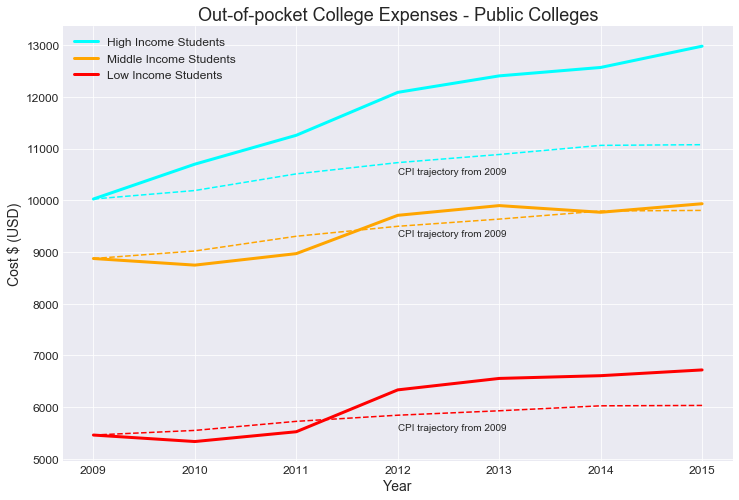

In [93]:
# Public Plots
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(public_df_high.groupby('year').sum()['weighted'], label='High Income Students', color='cyan', lw=3)
plt.plot(public_df_mid.groupby('year').sum()['weighted'], label='Middle Income Students', color='orange', lw=3)
plt.plot(public_df_low.groupby('year').sum()['weighted'], label='Low Income Students', color='red', lw=3)

plt.plot(np.arange(2009,2016,1), public_high_cpi, linestyle='--', color='cyan')
plt.plot(np.arange(2009,2016,1), public_mid_cpi, linestyle='--', color='orange')
plt.plot(np.arange(2009,2016,1), public_low_cpi, linestyle='--', color='red')

plt.title('Out-of-pocket College Expenses - Public Colleges', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cost $ (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.legend(fontsize=12)

plt.text(2012, public_high_cpi[2], 'CPI trajectory from 2009', fontsize=10)
plt.text(2012, public_mid_cpi[2], 'CPI trajectory from 2009', fontsize=10)
plt.text(2012, public_low_cpi[1], 'CPI trajectory from 2009', fontsize=10)

Text(2012,5152.96,'CPI trajectory from 2009')

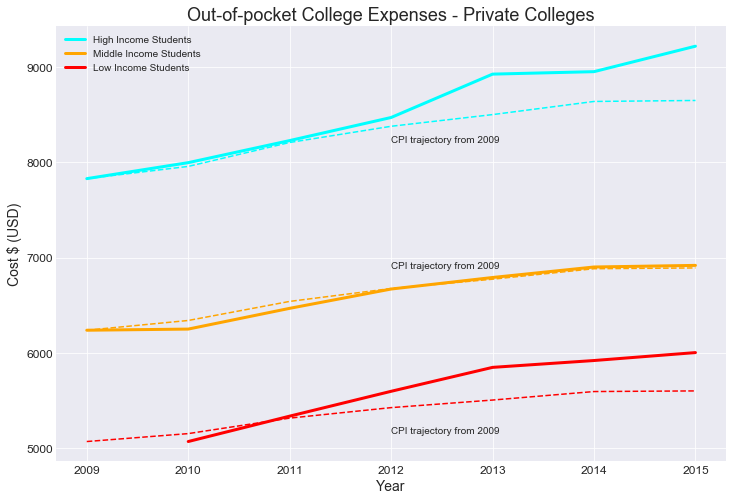

In [94]:
# Private Plots
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(private_df_high.groupby('year').sum()['weighted'], label='High Income Students', color='cyan', lw=3)
plt.plot(private_df_mid.groupby('year').sum()['weighted'], label='Middle Income Students', color='orange', lw=3)
plt.plot(private_df_low.groupby('year').sum()['weighted'], label='Low Income Students', color='red', lw=3)

plt.plot(np.arange(2009,2016,1), private_high_cpi, linestyle='--', color='cyan')
plt.plot(np.arange(2009,2016,1), private_mid_cpi, linestyle='--', color='orange')
plt.plot(np.arange(2009,2016,1), private_low_cpi, linestyle='--', color='red')

plt.title('Out-of-pocket College Expenses - Private Colleges', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cost $ (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=10)

plt.text(2012, private_high_cpi[2], 'CPI trajectory from 2009', fontsize=10)
plt.text(2012, private_mid_cpi[5], 'CPI trajectory from 2009', fontsize=10)
plt.text(2012, private_low_cpi[1], 'CPI trajectory from 2009', fontsize=10)

In [95]:
# 1 is public, 2 is private non-profit, 3 is private for-profit
Counter(school_df['school.ownership'])

Counter({1: 544, 2: 1182, 3: 67})

## Bring in Earnings Data

In [96]:
earnings_df = pd.read_csv('../data/earnings_df.csv')

In [97]:
# Only interested in schools that met our criteria
id_mask = earnings_df['id'].apply(lambda x: True if x in list(college_ids) else False)
earnings_df = earnings_df[id_mask]

In [98]:
earnings_df.shape

(1793, 57)

In [99]:
earnings_df.isnull().sum()

Unnamed: 0                                                                0
2007.earnings.10_yrs_after_entry.mean_earnings.highest_tercile          480
2007.earnings.10_yrs_after_entry.mean_earnings.lowest_tercile           476
2007.earnings.10_yrs_after_entry.mean_earnings.middle_tercile           464
2007.earnings.10_yrs_after_entry.median                                 204
2007.earnings.10_yrs_after_entry.not_working_not_enrolled.overall       159
2007.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings     204
2008.earnings.10_yrs_after_entry.mean_earnings.highest_tercile         1793
2008.earnings.10_yrs_after_entry.mean_earnings.lowest_tercile          1793
2008.earnings.10_yrs_after_entry.mean_earnings.middle_tercile          1793
2008.earnings.10_yrs_after_entry.median                                1793
2008.earnings.10_yrs_after_entry.not_working_not_enrolled.overall      1793
2008.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings    1793
2009.earning

In [100]:
earnings_drop_cols = []
for col in earnings_df.columns:
    if earnings_df.isnull().sum()[col] == 1793:
        earnings_drop_cols.append(col)

In [101]:
earnings_df.drop(earnings_drop_cols, axis=1, inplace=True)

In [102]:
earnings_df.columns

Index(['Unnamed: 0',
       '2007.earnings.10_yrs_after_entry.mean_earnings.highest_tercile',
       '2007.earnings.10_yrs_after_entry.mean_earnings.lowest_tercile',
       '2007.earnings.10_yrs_after_entry.mean_earnings.middle_tercile',
       '2007.earnings.10_yrs_after_entry.median',
       '2007.earnings.10_yrs_after_entry.not_working_not_enrolled.overall',
       '2007.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings',
       '2009.earnings.10_yrs_after_entry.mean_earnings.highest_tercile',
       '2009.earnings.10_yrs_after_entry.mean_earnings.lowest_tercile',
       '2009.earnings.10_yrs_after_entry.mean_earnings.middle_tercile',
       '2009.earnings.10_yrs_after_entry.median',
       '2009.earnings.10_yrs_after_entry.not_working_not_enrolled.overall',
       '2009.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings',
       '2011.earnings.10_yrs_after_entry.mean_earnings.highest_tercile',
       '2011.earnings.10_yrs_after_entry.mean_earnings.lowest_te

In [103]:
earnings_df.columns[:7]

Index(['Unnamed: 0',
       '2007.earnings.10_yrs_after_entry.mean_earnings.highest_tercile',
       '2007.earnings.10_yrs_after_entry.mean_earnings.lowest_tercile',
       '2007.earnings.10_yrs_after_entry.mean_earnings.middle_tercile',
       '2007.earnings.10_yrs_after_entry.median',
       '2007.earnings.10_yrs_after_entry.not_working_not_enrolled.overall',
       '2007.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings'],
      dtype='object')

In [104]:
cols_of_interest = []
for column in earnings_df.columns:
    if 'working_not_enrolled.mean' in column:
        cols_of_interest.append(column)

In [105]:
cols_of_interest

['2007.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings',
 '2009.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings',
 '2011.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings',
 '2012.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings',
 '2013.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings']

In [106]:
new_earnings_df = pd.DataFrame(columns=['id', 'year',
                                        '10_years_mean_earnings',
                                       ])

for column in cols_of_interest:
    year = column[:4]
    for i in earnings_df.index:
        new_earnings_df = new_earnings_df.append({'id':earnings_df.loc[i,'id'], 
                                                  'year':year,
                                                  '10_years_mean_earnings':earnings_df.loc[i,column]
                                                 }, ignore_index=True)

In [107]:
new_earnings_df.head()

,id,year,10_years_mean_earnings
0,137351.0,2007,49800.0
1,135364.0,2007,NaN
2,133553.0,2007,63200.0
3,126076.0,2007,NaN
4,131803.0,2007,57800.0


In [108]:
new_earnings_df['id'] = new_earnings_df['id'].apply(lambda x: int(x))
new_earnings_df.set_index('id', inplace=True, drop=True)

In [109]:
# Join 2015 student body size to our df's, so we can weight the earnings by student body size
new_earnings_df = new_earnings_df.join(student_df['2015.student.size'], how='left')
new_earnings_df = new_earnings_df.join(school_df['school.ownership'], how='left')

In [110]:
new_earnings_df['weighted'] = new_earnings_df['10_years_mean_earnings'] * (new_earnings_df['2015.student.size'] / total_2015_students)

In [111]:
new_earnings_df.head(10)

,year,10_years_mean_earnings,2015.student.size,school.ownership,weighted
id,,,,,
100654,2007,37800.0,4505.0,1,20.214268
100654,2009,36600.0,4505.0,1,19.572546
100654,2011,35300.0,4505.0,1,18.877346
100654,2012,35000.0,4505.0,1,18.716915
100654,2013,34300.0,4505.0,1,18.342577
100663,2007,47700.0,11269.0,1,63.808009
100663,2009,48500.0,11269.0,1,64.878164
100663,2011,46300.0,11269.0,1,61.935237
100663,2012,46300.0,11269.0,1,61.935237


In [112]:
earnings_cpi = [34267.36]

for year in np.arange(2008,2014,2):
    cpi = ep.normalize(earnings_cpi[0], region="USA", from_year=2007, to_year=year, 
                       base_currency="USD")
    earnings_cpi.append(cpi)

In [113]:
earnings_cpi

[34267.36, 35582.92, 36037.91, 37944.85]

In [114]:
new_earnings_df['year'] = new_earnings_df['year'].astype(int)

In [115]:
new_earnings_df[new_earnings_df['school.ownership']==1].groupby('year').sum()['weighted']

year
2007    34267.359469
2009    33426.521765
2011    32774.943870
2012    32788.723401
2013    33607.259908
Name: weighted, dtype: float64

Text(2011,36037.9,'CPI trajectory from 2009')

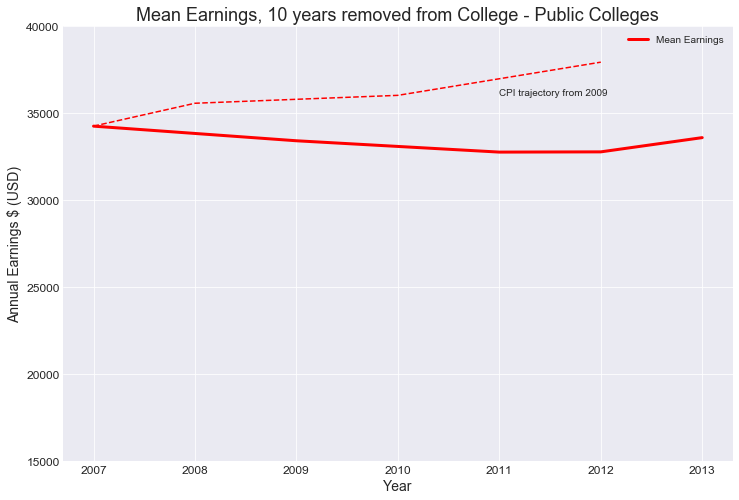

In [116]:
# Public Plots
fig, ax = plt.subplots(figsize=(12,8))

plt.plot([2007,2008,2010,2012], earnings_cpi, linestyle='--', color='red')

plt.plot(new_earnings_df[new_earnings_df['school.ownership']==1].groupby('year').sum()['weighted'],
        label='Mean Earnings', color='red', lw=3)

plt.title('Mean Earnings, 10 years removed from College - Public Colleges', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Annual Earnings $ (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylim(15000,40000)
plt.legend(fontsize=10)

plt.text(2011, earnings_cpi[2], 'CPI trajectory from 2009', fontsize=10)

In [117]:
new_earnings_df[new_earnings_df['school.ownership']!=1].groupby('year').sum()['weighted']

year
2007    17091.745695
2009    16647.371156
2011    16678.422053
2012    16755.007907
2013    17260.475798
Name: weighted, dtype: float64

In [118]:
earnings_cpi = [17091.75]

for year in np.arange(2008,2014,2):
    cpi = ep.normalize(earnings_cpi[0], region="USA", from_year=2007, to_year=year, 
                       base_currency="USD")
    earnings_cpi.append(cpi)

Text(2011,17974.9,'CPI trajectory from 2009')

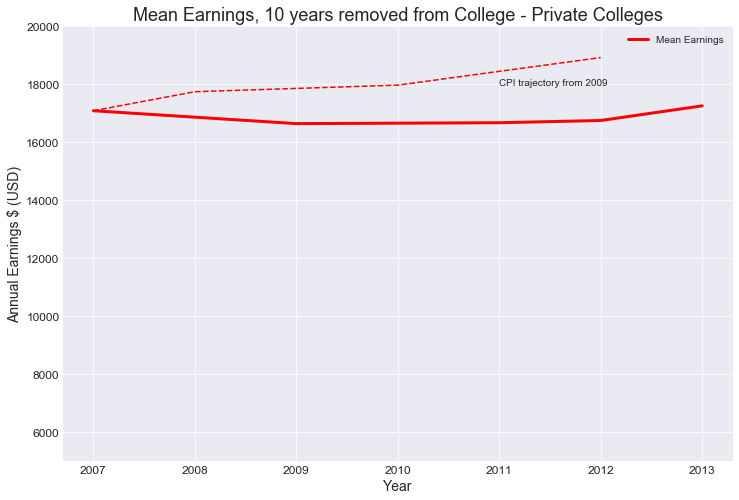

In [119]:
# Private Plots
fig, ax = plt.subplots(figsize=(12,8))

plt.plot([2007,2008,2010,2012], earnings_cpi, linestyle='--', color='red')

plt.plot(new_earnings_df[new_earnings_df['school.ownership']!=1].groupby('year').sum()['weighted'],
        label='Mean Earnings', color='red', lw=3)

plt.title('Mean Earnings, 10 years removed from College - Private Colleges', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Annual Earnings $ (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylim(5000,20000)
plt.legend(fontsize=10)

plt.text(2011, earnings_cpi[2], 'CPI trajectory from 2009', fontsize=10)

In [120]:
new_earnings_df.sort_values('10_years_mean_earnings', ascending=False)

,year,10_years_mean_earnings,2015.student.size,school.ownership,weighted
id,,,,,
435000,2012,220100.0,39.0,1,1.018958
435000,2013,167300.0,39.0,1,0.774519
196255,2012,162200.0,347.0,1,6.681158
196255,2011,162000.0,347.0,1,6.672920
196255,2013,160900.0,347.0,1,6.627610
196307,2011,152700.0,217.0,1,3.933419
166027,2007,148400.0,7333.0,2,129.177543
166683,2013,142100.0,4474.0,2,75.467766
228635,2012,141900.0,0.0,1,0.000000


In [125]:
school_df.loc[166027]['school.name']

'Harvard University'

In [128]:
test = new_earnings_df.join(school_df['school.name']).sort_values('10_years_mean_earnings', ascending=False)

In [134]:
test[test['year']==2013][['year','10_years_mean_earnings','school.name','2015.student.size']].head(10)

,year,10_years_mean_earnings,school.name,2015.student.size
id,,,,
435000,2013,167300.0,Louisiana State University Health Sciences Cen...,39.0
196255,2013,160900.0,SUNY Downstate Medical Center,347.0
166683,2013,142100.0,Massachusetts Institute of Technology,4474.0
166027,2013,136700.0,Harvard University,7333.0
229300,2013,128400.0,The University of Texas Health Science Center ...,677.0
215062,2013,123600.0,University of Pennsylvania,10666.0
243744,2013,122900.0,Stanford University,6994.0
216366,2013,122900.0,Thomas Jefferson University,738.0
228635,2013,122000.0,University of Texas Southwestern Medical Center,0.0


# Modeling

In [135]:
public_df_low

,year,cost,2015.student.size,weighted
id,,,,
100654,2009,7448.0,4505.0,3.982960
100654,2010,7015.0,4505.0,3.751405
100654,2011,7466.0,4505.0,3.992585
100654,2012,10931.0,4505.0,5.845560
100654,2013,12683.0,4505.0,6.782475
100654,2014,14601.0,4505.0,7.808162
100654,2015,13075.0,4505.0,6.992105
100663,2009,9491.0,11269.0,12.696055
100663,2010,9890.0,11269.0,13.229795


In [136]:
school_df.head()

,school.branches,school.carnegie_basic,school.carnegie_size_setting,school.carnegie_undergrad,school.degrees_awarded.highest,school.degrees_awarded.predominant,school.faculty_salary,school.ft_faculty_rate,school.institutional_characteristics.level,school.instructional_expenditure_per_fte,school.locale,school.main_campus,school.name,school.online_only,school.operating,school.ownership,school.state,school.tuition_revenue_per_fte,school.under_investigation,faculty_salary_yrly
id,,,,,,,,,,,,,,,,,,,,
137351,3,15.0,15.0,9.0,4,3,9382.0,0.7669,1,9275.0,11.0,1,University of South Florida-Main Campus,0.0,1,1,FL,6669.0,0,112584.0
135364,1,24.0,6.0,5.0,4,3,5449.0,0.4722,1,2554.0,21.0,1,Luther Rice College & Seminary,0.0,1,2,GA,6595.0,0,65388.0
133553,2,19.0,13.0,14.0,4,3,9099.0,0.8786,1,16076.0,13.0,1,Embry-Riddle Aeronautical University-Daytona B...,0.0,1,2,FL,28796.0,0,109188.0
126076,1,24.0,8.0,11.0,3,3,2719.0,NaN,1,10505.0,11.0,1,Yeshiva Ohr Elchonon Chabad West Coast Talmudi...,0.0,1,2,CA,12391.0,0,32628.0
131803,79,18.0,6.0,5.0,4,3,8775.0,0.1094,1,2383.0,11.0,1,Strayer University-District of Columbia,0.0,1,3,DC,16427.0,0,105300.0


In [137]:
cols_to_join = ['school.branches', 'school.degrees_awarded.highest', 'school.degrees_awarded.predominant',
               'school.faculty_salary', 'school.ft_faculty_rate', 'school.instructional_expenditure_per_fte',
               'school.ownership', 'school.tuition_revenue_per_fte']

In [138]:
#cost_df_clean = pd.concat([public_df_low, public_df_mid, public_df_high, 
#           private_df_low, private_df_mid, private_df_high])
#cost_df_clean = pd.concat([public_df_high, private_df_high])
#cost_df_clean_public_high = pd.concat([public_df_high])

In [139]:
cost_df_clean_public_high = public_df_high.join(school_df[cols_to_join])
cost_df_clean_public_low = public_df_low.join(school_df[cols_to_join])
cost_df_clean_private_high = private_df_high.join(school_df[cols_to_join])
cost_df_clean_private_low = private_df_low.join(school_df[cols_to_join])

In [140]:
cost_df_clean_public_high['year'] = cost_df_clean_public_high['year'].apply(lambda x: int(x))
cost_df_clean_public_low['year'] = cost_df_clean_public_low['year'].apply(lambda x: int(x))
cost_df_clean_private_high['year'] = cost_df_clean_private_high['year'].apply(lambda x: int(x))
cost_df_clean_private_low['year'] = cost_df_clean_private_low['year'].apply(lambda x: int(x))

In [141]:
# Let's remove negative costs, these don't seem to make sense
cost_df_clean_public_high = cost_df_clean_public_high[cost_df_clean_public_high['cost'] > 0]
cost_df_clean_public_low = cost_df_clean_public_low[cost_df_clean_public_low['cost'] > 0]
cost_df_clean_private_high = cost_df_clean_private_high[cost_df_clean_private_high['cost'] > 0]
cost_df_clean_private_low = cost_df_clean_private_low[cost_df_clean_private_low['cost'] > 0]

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [143]:
cost_df_clean_public_high.head()

,year,cost,2015.student.size,weighted,school.branches,school.degrees_awarded.highest,school.degrees_awarded.predominant,school.faculty_salary,school.ft_faculty_rate,school.instructional_expenditure_per_fte,school.ownership,school.tuition_revenue_per_fte
id,,,,,,,,,,,,
100654,2009,6011.0,4505.0,3.214497,1,4,3,7017.0,0.7096,7941.0,1,9657.0
100654,2010,12670.0,4505.0,6.775523,1,4,3,7017.0,0.7096,7941.0,1,9657.0
100654,2011,13892.0,4505.0,7.429011,1,4,3,7017.0,0.7096,7941.0,1,9657.0
100654,2012,15181.0,4505.0,8.118328,1,4,3,7017.0,0.7096,7941.0,1,9657.0
100654,2013,15416.0,4505.0,8.243999,1,4,3,7017.0,0.7096,7941.0,1,9657.0


In [144]:
#dummies = pd.get_dummies(cost_df_clean['school.ownership'], prefix='ownership', drop_first=True)
#cost_df_clean = pd.concat([cost_df_clean, dummies], axis=1)
#cost_df_clean.drop(['school.ownership'], axis=1, inplace=True)
#cost_df_clean.head()

In [145]:
cost_df_clean_public_high.drop('school.ownership', axis=1, inplace=True)
cost_df_clean_public_low.drop('school.ownership', axis=1, inplace=True)
cost_df_clean_private_high.drop('school.ownership', axis=1, inplace=True)
cost_df_clean_private_low.drop('school.ownership', axis=1, inplace=True)

In [146]:
cost_df_clean_private_high.dropna(inplace=True)
cost_df_clean_private_low.dropna(inplace=True)

In [147]:
print(cost_df_clean_public_high.shape) # Use for model1
print(cost_df_clean_public_low.shape) # Use for model2
print(cost_df_clean_private_high.shape) # Use for model3
print(cost_df_clean_private_low.shape) # Use for model4

(3430, 11)
(3634, 11)
(6852, 11)
(6597, 11)


In [148]:
X1 = cost_df_clean_public_high.drop('cost', axis=1)
X2 = cost_df_clean_public_low.drop('cost', axis=1)
X3 = cost_df_clean_private_high.drop('cost', axis=1)
X4 = cost_df_clean_private_low.drop('cost', axis=1)

y1= cost_df_clean_public_high['cost']
y2= cost_df_clean_public_low['cost']
y3= cost_df_clean_private_high['cost']
y4= cost_df_clean_private_low['cost']

In [149]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.3)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.3)

#ss = StandardScaler()
#Xs_train = ss.fit_transform(X_train)
#Xs_test = ss.transform(X_test)

In [150]:
linreg1 = LinearRegression(fit_intercept=True)
linreg1.fit(X1_train, y1_train)

linreg2 = LinearRegression(fit_intercept=True)
linreg2.fit(X2_train, y2_train)

linreg3 = LinearRegression(fit_intercept=True)
linreg3.fit(X3_train, y3_train)

linreg4 = LinearRegression(fit_intercept=True)
linreg4.fit(X4_train, y4_train)

/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [151]:
print(cross_val_score(linreg1, X1_test, y1_test))
print(cross_val_score(linreg2, X2_test, y2_test))
print(cross_val_score(linreg3, X3_test, y3_test))
print(cross_val_score(linreg4, X4_test, y4_test))

[0.69691959 0.69087256 0.68028596]
[0.6327312  0.67246897 0.64300751]
[0.60917666 0.64970142 0.67357953]
[0.38484455 0.38008127 0.31717652]


In [152]:
preds1 = linreg1.predict(X1_test)
preds2 = linreg2.predict(X2_test)
preds3 = linreg3.predict(X3_test)
preds4 = linreg4.predict(X4_test)

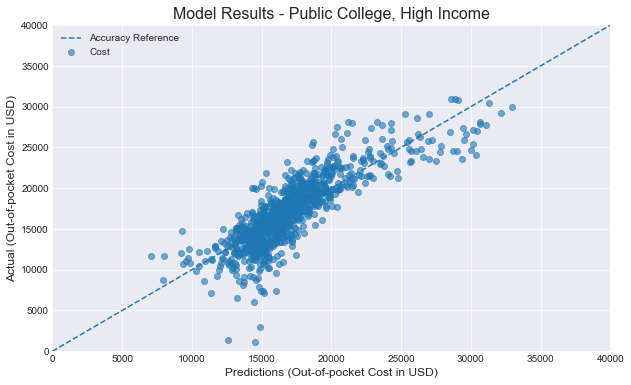

In [153]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(preds1, y1_test, alpha=0.6, label='Cost')
plt.plot([0,40000],[0,40000], linestyle='--', label='Accuracy Reference')

#ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
#ax.set_yticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])

plt.title('Model Results - Public College, High Income', fontsize=16)
plt.xlabel('Predictions (Out-of-pocket Cost in USD)', fontsize=12)
plt.ylabel('Actual (Out-of-pocket Cost in USD)', fontsize=12)
plt.xlim(0,40000)
plt.ylim(0,40000)
plt.legend();

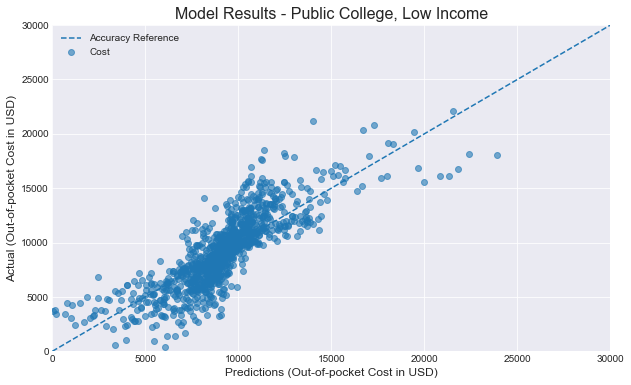

In [154]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(preds2, y2_test, alpha=0.6, label='Cost')
plt.plot([0,40000],[0,40000], linestyle='--', label='Accuracy Reference')

#ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
#ax.set_yticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])

plt.title('Model Results - Public College, Low Income', fontsize=16)
plt.xlabel('Predictions (Out-of-pocket Cost in USD)', fontsize=12)
plt.ylabel('Actual (Out-of-pocket Cost in USD)', fontsize=12)
plt.xlim(0,30000)
plt.ylim(0,30000)
plt.legend();

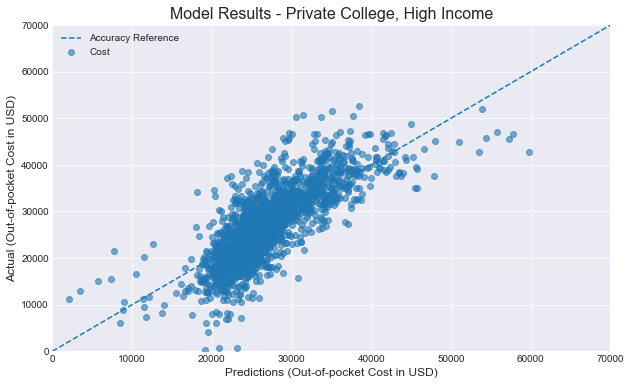

In [155]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(preds3, y3_test, alpha=0.6, label='Cost')
plt.plot([0,70000],[0,70000], linestyle='--', label='Accuracy Reference')

#ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
#ax.set_yticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])

plt.title('Model Results - Private College, High Income', fontsize=16)
plt.xlabel('Predictions (Out-of-pocket Cost in USD)', fontsize=12)
plt.ylabel('Actual (Out-of-pocket Cost in USD)', fontsize=12)
plt.xlim(0,70000)
plt.ylim(0,70000)
plt.legend();

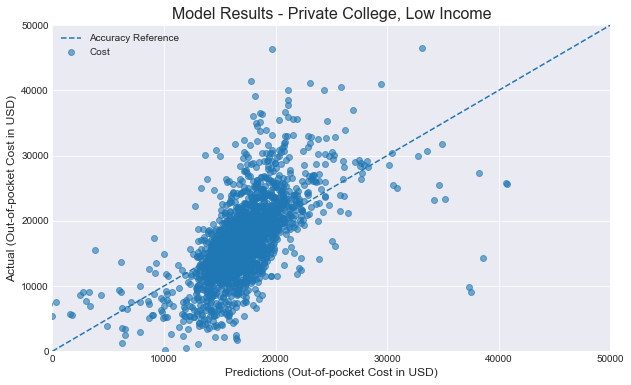

In [156]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(preds4, y4_test, alpha=0.6, label='Cost')
plt.plot([0,50000],[0,50000], linestyle='--', label='Accuracy Reference')

#ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
#ax.set_yticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])

plt.title('Model Results - Private College, Low Income', fontsize=16)
plt.xlabel('Predictions (Out-of-pocket Cost in USD)', fontsize=12)
plt.ylabel('Actual (Out-of-pocket Cost in USD)', fontsize=12)
plt.xlim(0,50000)
plt.ylim(0,50000)
plt.legend();

In [157]:
print(linreg1.coef_[0])
print(linreg2.coef_[0])
print(linreg3.coef_[0])
print(linreg4.coef_[0])

318.7114719423113
163.60110300194674
427.6484037424373
296.7329541049624


# Example School

In [171]:
polytechs = []
for i in school_df['school.name']:
    if 'Poly' in i:
        polytechs.append(i)

In [172]:
polytechs

['Rensselaer Polytechnic Institute',
 'California State Polytechnic University-Pomona',
 'SUNY Polytechnic Institute',
 'Worcester Polytechnic Institute',
 'California Polytechnic State University-San Luis Obispo',
 'Virginia Polytechnic Institute and State University']

In [173]:
school_df[school_df['school.name']=='Rensselaer Polytechnic Institute']

,school.branches,school.carnegie_basic,school.carnegie_size_setting,school.carnegie_undergrad,school.degrees_awarded.highest,school.degrees_awarded.predominant,school.faculty_salary,school.ft_faculty_rate,school.institutional_characteristics.level,school.instructional_expenditure_per_fte,school.locale,school.main_campus,school.name,school.online_only,school.operating,school.ownership,school.state,school.tuition_revenue_per_fte,school.under_investigation,faculty_salary_yrly
id,,,,,,,,,,,,,,,,,,,,
194824,2,15.0,14.0,14.0,4,3,12406.0,0.876,1,19285.0,13.0,1,Rensselaer Polytechnic Institute,0.0,1,2,NY,27375.0,0,148872.0


In [181]:
cost_df_clean_private_high[cost_df_clean_private_high.index==194824]

,year,cost,2015.student.size,weighted,school.branches,school.degrees_awarded.highest,school.degrees_awarded.predominant,school.faculty_salary,school.ft_faculty_rate,school.instructional_expenditure_per_fte,school.tuition_revenue_per_fte
id,,,,,,,,,,,
194824,2009,33020.0,5781.0,22.659560,2,4,3,12406.0,0.876,19285.0,27375.0
194824,2010,35071.0,5781.0,24.067033,2,4,3,12406.0,0.876,19285.0,27375.0
194824,2011,35633.0,5781.0,24.452698,2,4,3,12406.0,0.876,19285.0,27375.0
194824,2012,38278.0,5781.0,26.267796,2,4,3,12406.0,0.876,19285.0,27375.0
194824,2013,37574.0,5781.0,25.784685,2,4,3,12406.0,0.876,19285.0,27375.0
194824,2014,38371.0,5781.0,26.331616,2,4,3,12406.0,0.876,19285.0,27375.0
194824,2015,40199.0,5781.0,27.586059,2,4,3,12406.0,0.876,19285.0,27375.0


In [182]:
X_rpi = cost_df_clean_private_high[cost_df_clean_private_high.index==194824].drop('cost',axis=1)
X_rpi = X_rpi[X_rpi['year']==2015]
X_rpi.set_value(194824,  'year', 2025)

pred_rpi = linreg3.predict(X_rpi)
pred_rpi

array([44443.59908211])

In [174]:
cost_df_clean_private_low[cost_df_clean_private_low.index==194824]

,year,cost,2015.student.size,weighted,school.branches,school.degrees_awarded.highest,school.degrees_awarded.predominant,school.faculty_salary,school.ft_faculty_rate,school.instructional_expenditure_per_fte,school.tuition_revenue_per_fte
id,,,,,,,,,,,
194824,2010,20055.0,5781.0,13.762492,2,4,3,12406.0,0.876,19285.0,27375.0
194824,2011,20360.0,5781.0,13.971794,2,4,3,12406.0,0.876,19285.0,27375.0
194824,2012,24154.0,5781.0,16.575379,2,4,3,12406.0,0.876,19285.0,27375.0
194824,2013,23115.0,5781.0,15.862378,2,4,3,12406.0,0.876,19285.0,27375.0
194824,2014,24151.0,5781.0,16.573320,2,4,3,12406.0,0.876,19285.0,27375.0
194824,2015,23194.0,5781.0,15.916591,2,4,3,12406.0,0.876,19285.0,27375.0


In [175]:
X_rpi = cost_df_clean_private_low[cost_df_clean_private_low.index==194824].drop('cost',axis=1)
X_rpi = X_rpi[X_rpi['year']==2015]
X_rpi.set_value(194824,  'year', 2025)

pred_rpi = linreg4.predict(X_rpi)
pred_rpi

In [193]:
cost_df_clean_public_low[cost_df_clean_public_low.index==100751]

,year,cost,2015.student.size,weighted,school.branches,school.degrees_awarded.highest,school.degrees_awarded.predominant,school.faculty_salary,school.ft_faculty_rate,school.instructional_expenditure_per_fte,school.tuition_revenue_per_fte
id,,,,,,,,,,,
100751,2009,15216.0,31005.0,56.002017,1,4,3,9710.0,0.7187,10312.0,13373.0
100751,2010,11379.0,31005.0,41.880057,1,4,3,9710.0,0.7187,10312.0,13373.0
100751,2011,13815.0,31005.0,50.845680,1,4,3,9710.0,0.7187,10312.0,13373.0
100751,2012,15605.0,31005.0,57.433720,1,4,3,9710.0,0.7187,10312.0,13373.0
100751,2013,18077.0,31005.0,66.531839,1,4,3,9710.0,0.7187,10312.0,13373.0
100751,2014,17957.0,31005.0,66.090183,1,4,3,9710.0,0.7187,10312.0,13373.0
100751,2015,17263.0,31005.0,63.535937,1,4,3,9710.0,0.7187,10312.0,13373.0


In [195]:
X_rpi = cost_df_clean_public_high[cost_df_clean_public_high.index==100751].drop('cost',axis=1)
X_rpi = X_rpi[X_rpi['year']==2015]
X_rpi.set_value(100751,  'year', 2025)

pred_rpi = linreg1.predict(X_rpi)
pred_rpi

array([30163.99392877])

In [192]:
X_rpi = cost_df_clean_public_low[cost_df_clean_public_low.index==100751].drop('cost',axis=1)
X_rpi = X_rpi[X_rpi['year']==2015]
X_rpi.set_value(100751,  'year', 2025)

pred_rpi = linreg2.predict(X_rpi)
pred_rpi

array([24642.90621688])

# For Corey

In [792]:
school_df.to_csv('./school_df_corey.csv')

In [794]:
earnings_df['id'] = earnings_df['id'].apply(lambda x: int(x))

In [796]:
earnings_df.set_index('id', inplace=True)

In [797]:
school_df.head()

,school.branches,school.carnegie_basic,school.carnegie_size_setting,school.carnegie_undergrad,school.degrees_awarded.highest,school.degrees_awarded.predominant,school.faculty_salary,school.ft_faculty_rate,school.institutional_characteristics.level,school.instructional_expenditure_per_fte,school.locale,school.main_campus,school.name,school.online_only,school.operating,school.ownership,school.state,school.tuition_revenue_per_fte,school.under_investigation
id,,,,,,,,,,,,,,,,,,,
137351,3,15.0,15.0,9.0,4,3,9382.0,0.7669,1,9275.0,11.0,1,University of South Florida-Main Campus,0.0,1,1,FL,6669.0,0
135364,1,24.0,6.0,5.0,4,3,5449.0,0.4722,1,2554.0,21.0,1,Luther Rice College & Seminary,0.0,1,2,GA,6595.0,0
133553,2,19.0,13.0,14.0,4,3,9099.0,0.8786,1,16076.0,13.0,1,Embry-Riddle Aeronautical University-Daytona B...,0.0,1,2,FL,28796.0,0
126076,1,24.0,8.0,11.0,3,3,2719.0,NaN,1,10505.0,11.0,1,Yeshiva Ohr Elchonon Chabad West Coast Talmudi...,0.0,1,2,CA,12391.0,0
131803,79,18.0,6.0,5.0,4,3,8775.0,0.1094,1,2383.0,11.0,1,Strayer University-District of Columbia,0.0,1,3,DC,16427.0,0


In [799]:
earnings_df.to_csv('./earnings_df_corey.csv')

# Stats Models - Low Priority

In [158]:
import statsmodels.api as sm

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [165]:
X1_sm = X1_train.values
X1_sm = np.concatenate([X1_sm, np.ones((X1_sm.shape[0], 1))], axis=1)
y1_sm = y1_train.values

In [166]:
model1 = sm.OLS(y1_sm, X1_sm)
model1 = model1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     607.2
Date:                Sun, 25 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:27:46   Log-Likelihood:                -21992.
No. Observations:                2401   AIC:                         4.400e+04
Df Residuals:                    2391   BIC:                         4.406e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           318.7115     24.802     12.850      0.000     270.075     367.348
x2            -0.7126      0.018    -38.964      0.000      -0.748      -0.677
x3           331.5327      8.201     40.428      0.000     315.452     347.614
x4          -380.8583     39.247     -9.704      0.000    -457.819    -303.897
x5          1402.3116    202.421      6.928      0.000    1005.373    1799.250
const      -1.897e+05    1.5e+04    -12.668      0.000   -2.19e+05    -1.6e+05
x6             0.3347      0.045      7.473      0.000       0.247       0.422
x7         -1427.1542    262.542     -5.436      0.000   -1941.988    -912.321
x8            -0.0888      0.015     -5.804      0.000      -0.119      -0.059
x9             0.3006      0.019     15.659      0.000       0.263       0.338
x10        -6.325e+04   4992.754    -12.668      0.000    -7.3e+04   -5.35e+04
==============================================================================
Omnibus:                      112.371   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.072
Skew:                          -0.319   Prob(JB):                     1.10e-50
Kurtosis:                       4.376   Cond. No.                     5.69e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.17e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [167]:
X2_sm = X2_train.values
X2_sm = np.concatenate([X2_sm, np.ones((X2_sm.shape[0], 1))], axis=1)
y2_sm = y2_train.values

model2 = sm.OLS(y2_sm, X2_sm)
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     491.3
Date:                Sun, 25 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:28:22   Log-Likelihood:                -22963.
No. Observations:                2543   AIC:                         4.595e+04
Df Residuals:                    2533   BIC:                         4.600e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           163.6011     20.115      8.133      0.000     124.157     203.045
x2            -0.4601      0.009    -49.403      0.000      -0.478      -0.442
x3           416.8777      7.674     54.323      0.000     401.830     431.926
x4          -318.4457     38.079     -8.363      0.000    -393.114    -243.777
x5          1437.7022    164.919      8.718      0.000    1114.312    1761.093
const      -9.777e+04   1.21e+04     -8.052      0.000   -1.22e+05    -7.4e+04
x6             0.0007      0.038      0.019      0.985      -0.074       0.075
x7            -7.2771    218.309     -0.033      0.973    -435.360     420.806
x8            -0.0494      0.013     -3.729      0.000      -0.075      -0.023
x9             0.1573      0.016      9.718      0.000       0.126       0.189
x10        -3.259e+04   4047.510     -8.052      0.000   -4.05e+04   -2.47e+04
==============================================================================
Omnibus:                      232.331   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              932.330
Skew:                           0.374   Prob(JB):                    3.52e-203
Kurtosis:                       5.871   Cond. No.                     4.32e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.54e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [168]:
X3_sm = X3_train.values
X3_sm = np.concatenate([X3_sm, np.ones((X3_sm.shape[0], 1))], axis=1)
y3_sm = y3_train.values

model3 = sm.OLS(y3_sm, X3_sm)
model3 = model3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     822.9
Date:                Sun, 25 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:29:01   Log-Likelihood:                -47638.
No. Observations:                4796   AIC:                         9.530e+04
Df Residuals:                    4786   BIC:                         9.536e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           427.6484     36.148     11.831      0.000     356.782     498.515
x2            -1.4401      0.052    -27.954      0.000      -1.541      -1.339
x3           462.5289     15.084     30.664      0.000     432.958     492.100
x4           -11.8253     39.529     -0.299      0.765     -89.320      65.669
x5          -845.9104    177.774     -4.758      0.000   -1194.429    -497.392
const      -2.528e+05   2.18e+04    -11.581      0.000   -2.96e+05    -2.1e+05
x6             1.0170      0.048     21.078      0.000       0.922       1.112
x7         -1614.6846    268.232     -6.020      0.000   -2140.543   -1088.826
x8            -0.0394      0.010     -3.927      0.000      -0.059      -0.020
x9             0.3482      0.011     31.632      0.000       0.327       0.370
x10        -8.425e+04   7275.386    -11.581      0.000   -9.85e+04      -7e+04
==============================================================================
Omnibus:                      703.922   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5991.299
Skew:                          -0.434   Prob(JB):                         0.00
Kurtosis:                       8.406   Cond. No.                     3.87e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.96e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [170]:
X4_sm = X4_train.values
X4_sm = np.concatenate([X4_sm, np.ones((X4_sm.shape[0], 1))], axis=1)
y4_sm = y4_train.values

model4 = sm.OLS(y4_sm, X4_sm)
model4 = model4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     310.2
Date:                Sun, 25 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:30:01   Log-Likelihood:                -45891.
No. Observations:                4617   AIC:                         9.180e+04
Df Residuals:                    4607   BIC:                         9.187e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           296.7330     43.259      6.859      0.000     211.924     381.542
x2            -1.5748      0.051    -30.932      0.000      -1.675      -1.475
x3           700.0423     19.694     35.545      0.000     661.432     738.653
x4            53.5429     22.330      2.398      0.017       9.765      97.321
x5           875.7765    180.250      4.859      0.000     522.401    1229.152
const      -1.754e+05   2.61e+04     -6.717      0.000   -2.27e+05   -1.24e+05
x6             0.2012      0.047      4.293      0.000       0.109       0.293
x7         -3304.7101    271.588    -12.168      0.000   -3837.154   -2772.267
x8            -0.1468      0.011    -13.930      0.000      -0.167      -0.126
x9             0.2418      0.013     18.893      0.000       0.217       0.267
x10        -5.848e+04   8706.651     -6.717      0.000   -7.55e+04   -4.14e+04
==============================================================================
Omnibus:                      608.514   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5884.990
Skew:                           0.276   Prob(JB):                         0.00
Kurtosis:                       8.503   Cond. No.                     2.30e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.8e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""